In [60]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from verification_system import VerificationSystem
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt

In [55]:
df_authorized = pd.DataFrame(
    {
        "image_path": [
            "data\database\incoming_users",
            "data\database\incoming_users",
            "data\database\incoming_users",
            "data\database\incoming_users",
            "data\database\incoming_users",
        ],
        "is_access_granted": [True, True, True, True, False],
        "distance": [0.2, 0.3, 0.2, 0.4, 0.5],
    }
)

In [56]:
df_unauthorized = pd.DataFrame(
    {
        "image_path": [
            "data\database\incoming_users",
            "data\database\incoming_users",
            "data\database\incoming_users",
            "data\database\incoming_users",
            "data\database\incoming_users",
        ],
        "is_access_granted": [False, False, False, True, False],
        "distance": [0.65, 0.45, 0.6, 0.3, 0.6],
    }
)

In [53]:
vs = VerificationSystem("data/database")

authorized_users
24-04-07 21:15:45 - Found 1819 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations: 100%|██████████| 1819/1819 [12:44<00:00,  2.38it/s]


24-04-07 21:28:30 - There are now 1826 representations in ds_facenet_opencv_v2.pkl
24-04-07 21:28:30 - Searching data/database\incoming_users\authorized_users\25\010802.jpg in 1826 length datastore
24-04-07 21:28:31 - find function duration 765.2876949310303 seconds


In [62]:
def draw_ROC_curve(
    df_users_authorized: pd.DataFrame, df_users_unauthorized: pd.DataFrame
):
    """
    Function to draw ROC curve based on DFs with authorized and unauthorized users, based on changing threshold
    of distance.
    :param df_users_authorized: DF with users in database
    :param df_users_unauthorized: DF with users that are not authorized in database
    :return: Tuple of TP, TN, FP, FN
    """
    df_concatenated = pd.concat([df_users_authorized, df_users_unauthorized], axis=0)
    true_labels = [True] * len(df_users_authorized) + [False] * len(
        df_users_unauthorized
    )
    predicted_labels = df_concatenated["is_access_granted"].to_list()
    distances = df_concatenated["distance"].values.reshape(-1, 1)

    scaler = MinMaxScaler()
    normalized_distances = scaler.fit_transform(distances)
    fpr, tpr, thresholds = roc_curve(true_labels, normalized_distances)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()

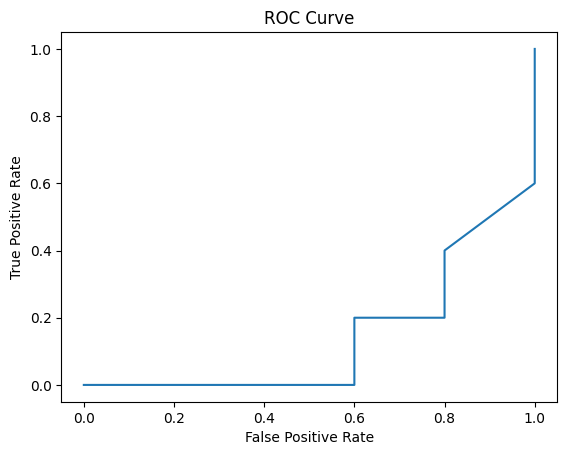

In [63]:
draw_ROC_curve(df_authorized, df_unauthorized)